In [ ]:
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [ ]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
  dataX, dataY = [], []
  for i in range(len(dataset)-look_back-1):
    a = dataset[i:(i+look_back), 0]
    dataX.append(a)
    dataY.append(dataset[i + look_back, 0])
  return numpy.array(dataX), numpy.array(dataY)

In [ ]:
# fix random seed for reproducibility
numpy.random.seed(7)
# load the dataset
dataframe = read_csv('international-airline-passengers.csv', usecols=[1], engine= 'python' )
dataset = dataframe.values
dataset = dataset.astype('float32')
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [ ]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss= 'mean_squared_error' , optimizer= 'adam' )
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
94/94 - 3s - loss: 0.0425 - 3s/epoch - 33ms/step
Epoch 2/100
94/94 - 0s - loss: 0.0215 - 268ms/epoch - 3ms/step
Epoch 3/100
94/94 - 0s - loss: 0.0157 - 198ms/epoch - 2ms/step
Epoch 4/100
94/94 - 0s - loss: 0.0143 - 253ms/epoch - 3ms/step
Epoch 5/100
94/94 - 0s - loss: 0.0134 - 162ms/epoch - 2ms/step
Epoch 6/100
94/94 - 0s - loss: 0.0125 - 138ms/epoch - 1ms/step
Epoch 7/100
94/94 - 0s - loss: 0.0114 - 245ms/epoch - 3ms/step
Epoch 8/100
94/94 - 0s - loss: 0.0105 - 155ms/epoch - 2ms/step
Epoch 9/100
94/94 - 0s - loss: 0.0096 - 231ms/epoch - 2ms/step
Epoch 10/100
94/94 - 0s - loss: 0.0086 - 158ms/epoch - 2ms/step
Epoch 11/100
94/94 - 0s - loss: 0.0076 - 214ms/epoch - 2ms/step
Epoch 12/100
94/94 - 0s - loss: 0.0067 - 168ms/epoch - 2ms/step
Epoch 13/100
94/94 - 0s - loss: 0.0058 - 153ms/epoch - 2ms/step
Epoch 14/100
94/94 - 0s - loss: 0.0050 - 133ms/epoch - 1ms/step
Epoch 15/100
94/94 - 0s - loss: 0.0042 - 151ms/epoch - 2ms/step
Epoch 16/100
94/94 - 0s - loss: 0.0036 - 129ms/epoc

In [ ]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print( 'Test Score: %.2f RMSE '% (testScore))


2/2 [==============================] - 0s 3ms/step
Train Score: 23.35 RMSE
Test Score: 46.97 RMSE 


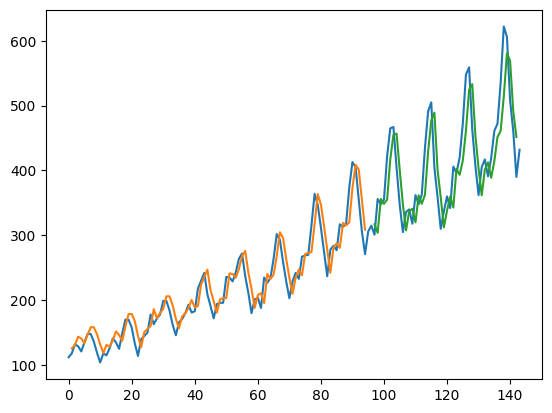

In [ ]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

# LSTM For Regression Using the Window Method

In [ ]:
# fix random seed for reproducibility
numpy.random.seed(7)
# load the dataset
dataframe = read_csv('international-airline-passengers.csv', usecols=[1], engine= 'python' )
dataset = dataframe.values
dataset = dataset.astype('float32')
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# reshape into X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [ ]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss= 'mean_squared_error' , optimizer= 'adam' )
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE '% (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print( 'Test Score: %.2f RMSE '% (testScore))


Epoch 1/100
92/92 - 1s - loss: 0.0272 - 1s/epoch - 16ms/step
Epoch 2/100
92/92 - 0s - loss: 0.0113 - 98ms/epoch - 1ms/step
Epoch 3/100
92/92 - 0s - loss: 0.0090 - 100ms/epoch - 1ms/step
Epoch 4/100
92/92 - 0s - loss: 0.0077 - 107ms/epoch - 1ms/step
Epoch 5/100
92/92 - 0s - loss: 0.0067 - 103ms/epoch - 1ms/step
Epoch 6/100
92/92 - 0s - loss: 0.0060 - 98ms/epoch - 1ms/step
Epoch 7/100
92/92 - 0s - loss: 0.0054 - 96ms/epoch - 1ms/step
Epoch 8/100
92/92 - 0s - loss: 0.0050 - 104ms/epoch - 1ms/step
Epoch 9/100
92/92 - 0s - loss: 0.0046 - 102ms/epoch - 1ms/step
Epoch 10/100
92/92 - 0s - loss: 0.0043 - 103ms/epoch - 1ms/step
Epoch 11/100
92/92 - 0s - loss: 0.0041 - 135ms/epoch - 1ms/step
Epoch 12/100
92/92 - 0s - loss: 0.0040 - 139ms/epoch - 2ms/step
Epoch 13/100
92/92 - 0s - loss: 0.0039 - 141ms/epoch - 2ms/step
Epoch 14/100
92/92 - 0s - loss: 0.0038 - 132ms/epoch - 1ms/step
Epoch 15/100
92/92 - 0s - loss: 0.0037 - 128ms/epoch - 1ms/step
Epoch 16/100
92/92 - 0s - loss: 0.0038 - 126ms/epoch -

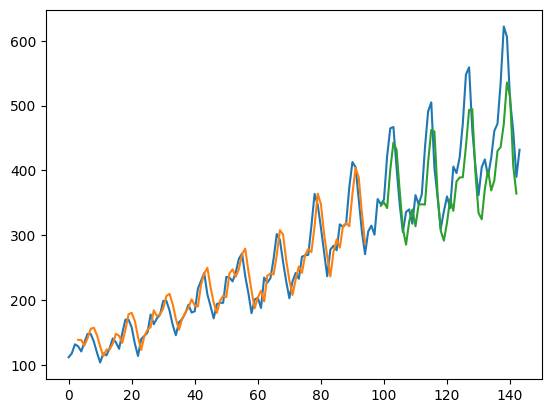

In [ ]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

# LSTM For Regression with Time Steps

In [ ]:
numpy.random.seed(7)
# load the dataset
dataframe = read_csv('international-airline-passengers.csv' , usecols=[1], engine= 'python' )
dataset = dataframe.values
dataset = dataset.astype( 'float32' )
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# reshape into X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = numpy.reshape(testX, (testX.shape[0], testX.shape[1], 1))


In [ ]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(look_back, 1)))
model.add(Dense(1))
model.compile(loss= 'mean_squared_error' , optimizer= 'adam' )
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print( 'Train Score: %.2f RMSE '% (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print( 'Test Score: %.2f RMSE '% (testScore))

Epoch 1/100
92/92 - 1s - loss: 0.0516 - 1s/epoch - 14ms/step
Epoch 2/100
92/92 - 0s - loss: 0.0211 - 113ms/epoch - 1ms/step
Epoch 3/100
92/92 - 0s - loss: 0.0165 - 122ms/epoch - 1ms/step
Epoch 4/100
92/92 - 0s - loss: 0.0149 - 114ms/epoch - 1ms/step
Epoch 5/100
92/92 - 0s - loss: 0.0132 - 128ms/epoch - 1ms/step
Epoch 6/100
92/92 - 0s - loss: 0.0116 - 110ms/epoch - 1ms/step
Epoch 7/100
92/92 - 0s - loss: 0.0100 - 121ms/epoch - 1ms/step
Epoch 8/100
92/92 - 0s - loss: 0.0088 - 117ms/epoch - 1ms/step
Epoch 9/100
92/92 - 0s - loss: 0.0075 - 117ms/epoch - 1ms/step
Epoch 10/100
92/92 - 0s - loss: 0.0064 - 112ms/epoch - 1ms/step
Epoch 11/100
92/92 - 0s - loss: 0.0057 - 114ms/epoch - 1ms/step
Epoch 12/100
92/92 - 0s - loss: 0.0051 - 113ms/epoch - 1ms/step
Epoch 13/100
92/92 - 0s - loss: 0.0048 - 118ms/epoch - 1ms/step
Epoch 14/100
92/92 - 0s - loss: 0.0046 - 109ms/epoch - 1ms/step
Epoch 15/100
92/92 - 0s - loss: 0.0045 - 111ms/epoch - 1ms/step
Epoch 16/100
92/92 - 0s - loss: 0.0044 - 110ms/epoc

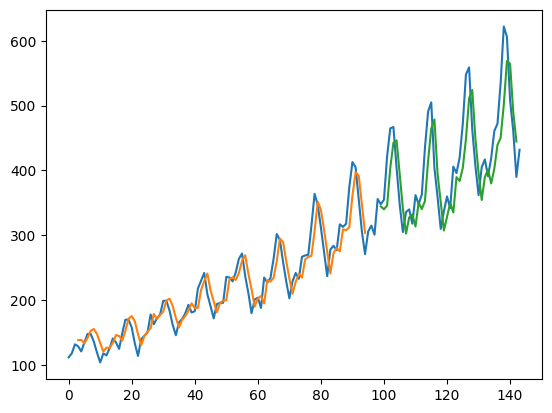

In [ ]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

# New LSTM With Memory Between Batches

In [ ]:
# fix random seed for reproducibility
numpy.random.seed(7)
# load the dataset
dataframe = read_csv( 'international-airline-passengers.csv' , usecols=[1], engine= 'python' )
dataset = dataframe.values
dataset = dataset.astype( 'float32' )
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# reshape into X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = numpy.reshape(testX, (testX.shape[0], testX.shape[1], 1))

In [ ]:
# create and fit the LSTM network
batch_size = 1
model = Sequential()
model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True))
model.add(Dense(1))
model.compile(loss= 'mean_squared_error' , optimizer= 'adam' )
for i in range(100):
  model.fit(trainX, trainY, epochs=1, batch_size=batch_size, verbose=2, shuffle=False)
  model.reset_states()
# make predictions
trainPredict = model.predict(trainX, batch_size=batch_size)
model.reset_states()
testPredict = model.predict(testX, batch_size=batch_size)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print( 'Train Score: %.2f RMSE '% (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print( 'Test Score: %.2f RMSE '% (testScore))

92/92 - 2s - loss: 0.0403 - 2s/epoch - 26ms/step
92/92 - 0s - loss: 0.0275 - 121ms/epoch - 1ms/step
92/92 - 0s - loss: 0.0239 - 107ms/epoch - 1ms/step
92/92 - 0s - loss: 0.0197 - 116ms/epoch - 1ms/step
92/92 - 0s - loss: 0.0163 - 112ms/epoch - 1ms/step
92/92 - 0s - loss: 0.0135 - 118ms/epoch - 1ms/step
92/92 - 0s - loss: 0.0112 - 113ms/epoch - 1ms/step
92/92 - 0s - loss: 0.0094 - 109ms/epoch - 1ms/step
92/92 - 0s - loss: 0.0081 - 120ms/epoch - 1ms/step
92/92 - 0s - loss: 0.0072 - 111ms/epoch - 1ms/step
92/92 - 0s - loss: 0.0067 - 118ms/epoch - 1ms/step
92/92 - 0s - loss: 0.0063 - 108ms/epoch - 1ms/step
92/92 - 0s - loss: 0.0060 - 109ms/epoch - 1ms/step
92/92 - 0s - loss: 0.0058 - 114ms/epoch - 1ms/step
92/92 - 0s - loss: 0.0056 - 109ms/epoch - 1ms/step
92/92 - 0s - loss: 0.0055 - 117ms/epoch - 1ms/step
92/92 - 0s - loss: 0.0053 - 110ms/epoch - 1ms/step
92/92 - 0s - loss: 0.0052 - 115ms/epoch - 1ms/step
92/92 - 0s - loss: 0.0052 - 107ms/epoch - 1ms/step
92/92 - 0s - loss: 0.0051 - 114ms

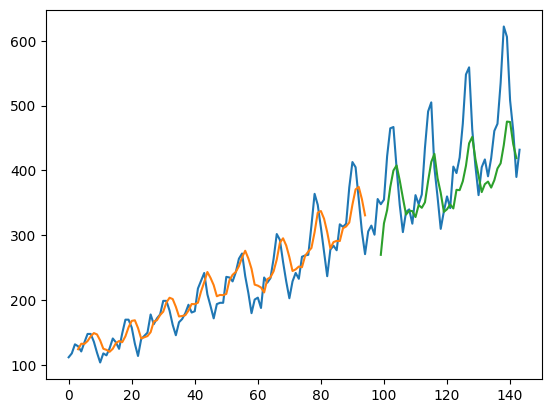

In [ ]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

# Stacked LSTMs With Memory Between Batches

In [ ]:
# fix random seed for reproducibility
numpy.random.seed(7)
# load the dataset
dataframe = read_csv( 'international-airline-passengers.csv' , usecols=[1], engine= 'python' )
dataset = dataframe.values
dataset = dataset.astype( 'float32' )
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# reshape into X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = numpy.reshape(testX, (testX.shape[0], testX.shape[1], 1))

In [ ]:
# create and fit the LSTM network
batch_size = 1
model = Sequential()
model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True,
return_sequences=True))
model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True))
model.add(Dense(1))
model.compile(loss= 'mean_squared_error' , optimizer= 'adam' )
for i in range(100):
  model.fit(trainX, trainY, epochs=1, batch_size=batch_size, verbose=2, shuffle=False)
  model.reset_states()
# make predictions
trainPredict = model.predict(trainX, batch_size=batch_size)
model.reset_states()
testPredict = model.predict(testX, batch_size=batch_size)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print( 'Train Score: %.2f RMSE '% (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print( 'Test Score: %.2f RMSE '% (testScore))

92/92 - 3s - loss: 0.0053 - 3s/epoch - 28ms/step
92/92 - 0s - loss: 0.0113 - 176ms/epoch - 2ms/step
92/92 - 0s - loss: 0.0085 - 172ms/epoch - 2ms/step
92/92 - 0s - loss: 0.0071 - 173ms/epoch - 2ms/step
92/92 - 0s - loss: 0.0064 - 161ms/epoch - 2ms/step
92/92 - 0s - loss: 0.0061 - 169ms/epoch - 2ms/step
92/92 - 0s - loss: 0.0059 - 228ms/epoch - 2ms/step
92/92 - 0s - loss: 0.0058 - 206ms/epoch - 2ms/step
92/92 - 0s - loss: 0.0058 - 207ms/epoch - 2ms/step
92/92 - 0s - loss: 0.0057 - 211ms/epoch - 2ms/step
92/92 - 0s - loss: 0.0057 - 217ms/epoch - 2ms/step
92/92 - 0s - loss: 0.0057 - 220ms/epoch - 2ms/step
92/92 - 0s - loss: 0.0057 - 202ms/epoch - 2ms/step
92/92 - 0s - loss: 0.0056 - 173ms/epoch - 2ms/step
92/92 - 0s - loss: 0.0056 - 183ms/epoch - 2ms/step
92/92 - 0s - loss: 0.0056 - 159ms/epoch - 2ms/step
92/92 - 0s - loss: 0.0056 - 171ms/epoch - 2ms/step
92/92 - 0s - loss: 0.0056 - 166ms/epoch - 2ms/step
92/92 - 0s - loss: 0.0056 - 169ms/epoch - 2ms/step
92/92 - 0s - loss: 0.0056 - 181ms

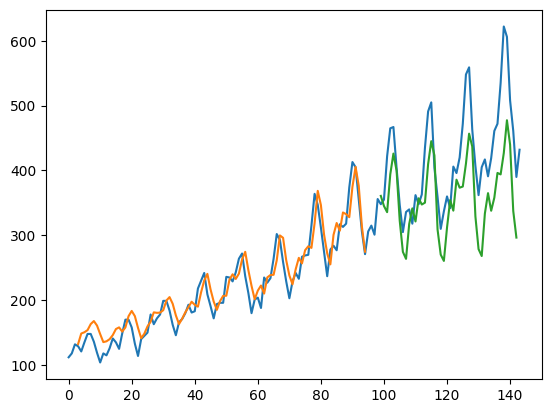

In [ ]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

# Simple LSTM for Sequence Classification


In [ ]:
import numpy
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Embedding
from keras.utils import pad_sequences
# fix random seed for reproducibility
numpy.random.seed(7)

In [ ]:
# load the dataset but only keep the top n words, zero the rest
top_words = 5000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_words)

In [ ]:
# truncate and pad input sequences
max_review_length = 500
X_train = pad_sequences(X_train, maxlen=max_review_length)
X_test = pad_sequences(X_test, maxlen=max_review_length)

In [ ]:
# create the model
embedding_vecor_length = 32
model = Sequential()
model.add(Embedding(top_words, embedding_vecor_length, input_length=max_review_length))
model.add(LSTM(100))
model.add(Dense(1, activation= 'sigmoid' ))
model.compile(loss= 'binary_crossentropy' , optimizer= 'adam' , metrics=[ 'accuracy' ])
model.summary()
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3, batch_size=64)

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 500, 32)           160000    
                                                                 
 lstm_7 (LSTM)               (None, 100)               53200     
                                                                 
 dense_6 (Dense)             (None, 1)                 101       
                                                                 
Total params: 213,301
Trainable params: 213,301
Non-trainable params: 0
_________________________________________________________________
Epoch 1/3
391/391 [==============================] - 218s 553ms/step - loss: 0.4620 - accuracy: 0.7698 - val_loss: 0.4121 - val_accuracy: 0.8356
Epoch 2/3
391/391 [==============================] - 214s 547ms/step - loss: 0.2995 - accuracy: 0.8778 - val_loss: 0.3382 - val_accuracy: 0.8640
Epoch 3/3
391/391 [===

In [ ]:
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 86.62%


# LSTM For Sequence Classification With Dropout

In [ ]:
from keras.layers import Dropout
# fix random seed for reproducibility
numpy.random.seed(7)
# load the dataset but only keep the top n words, zero the rest
top_words = 5000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_words)
# truncate and pad input sequences
max_review_length = 500
X_train = pad_sequences(X_train, maxlen=max_review_length)
X_test = pad_sequences(X_test, maxlen=max_review_length)
# create the model
embedding_vecor_length = 32
model = Sequential()
model.add(Embedding(top_words, embedding_vecor_length, input_length=max_review_length))
model.add(Dropout(0.2))
model.add(LSTM(100))
model.add(Dropout(0.2))
model.add(Dense(1, activation= 'sigmoid' ))
model.compile(loss= 'binary_crossentropy' , optimizer= 'adam' , metrics=[ 'accuracy' ])
model.summary()
model.fit(X_train, y_train, epochs=3, batch_size=64)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 500, 32)           160000    
                                                                 
 dropout (Dropout)           (None, 500, 32)           0         
                                                                 
 lstm_8 (LSTM)               (None, 100)               53200     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 213,301
Trainable params: 213,301
Non-trainable params: 0
_________________________________________________________________
Epoch 1/3
391/391 [=============================

In [ ]:
numpy.random.seed(7)
# load the dataset but only keep the top n words, zero the rest
top_words = 5000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_words)
# truncate and pad input sequences
max_review_length = 500
X_train = pad_sequences(X_train, maxlen=max_review_length)
X_test = pad_sequences(X_test, maxlen=max_review_length)
# create the model
embedding_vecor_length = 32
model = Sequential()
model.add(Embedding(top_words, embedding_vecor_length, input_length=max_review_length))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation= 'sigmoid' ))
model.compile(loss= 'binary_crossentropy' , optimizer= 'adam' , metrics=[ 'accuracy' ])
model.summary()
model.fit(X_train, y_train, epochs=3, batch_size=64)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 500, 32)           160000    
                                                                 
 lstm_9 (LSTM)               (None, 100)               53200     
                                                                 
 dense_8 (Dense)             (None, 1)                 101       
                                                                 
Total params: 213,301
Trainable params: 213,301
Non-trainable params: 0
_________________________________________________________________
Epoch 1/3
391/391 [==============================] - 288s 731ms/step - loss: 0.4636 - accuracy: 0.7692
Epoch 2/3
391/391 [==============================] - 283s 725ms/step - loss: 0.4308 - accuracy: 0.7975
Epoch 3/3
391/391 [==============================] - 283s 725ms/step - loss: 0.4717 - accuracy: 0.7782
Acc

# LSTM and CNN For Sequence Classification

In [ ]:
# LSTM and CNN for sequence classification in the IMDB dataset
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
# fix random seed for reproducibility
numpy.random.seed(7)
# load the dataset but only keep the top n words, zero the rest
top_words = 5000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_words)
# truncate and pad input sequences
max_review_length = 500
X_train = pad_sequences(X_train, maxlen=max_review_length)
X_test = pad_sequences(X_test, maxlen=max_review_length)
# create the model
embedding_vecor_length = 32
model = Sequential()
model.add(Embedding(top_words, embedding_vecor_length, input_length=max_review_length))
model.add(Conv1D(filters=32, kernel_size=3, padding= 'same' , activation= 'relu' ))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(100))
model.add(Dense(1, activation= 'sigmoid' ))
model.compile(loss= 'binary_crossentropy' , optimizer= 'adam' , metrics=[ 'accuracy' ])
model.summary()
model.fit(X_train, y_train, epochs=3, batch_size=64)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))


Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 500, 32)           160000    
                                                                 
 conv1d (Conv1D)             (None, 500, 32)           3104      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 250, 32)          0         
 )                                                               
                                                                 
 lstm_10 (LSTM)              (None, 100)               53200     
                                                                 
 dense_9 (Dense)             (None, 1)                 101       
                                                                 
Total params: 216,405
Trainable params: 216,405
Non-trainable params: 0
________________________________________________